#Exploratory Data Analysis

Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the file and print the first 5 rows of data

In [2]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


describe() function is used to calculate statistical data of the DataFrame

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


info() function is used to give a summary of the DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


isnull().sum() is used to get the count of null values

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The zeroes values in the columns are replaced to NaN values and then impute accordingly with median

In [6]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [7]:
def median_target(data, var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [8]:
def replace_median(data, columns):
    for i in columns:
        f = median_target(data, i)
        display(f)
        data.loc[(data['Outcome'] == 0 ) & (data[i].isnull()), i] = f[[i]].values[0][0]
        data.loc[(data['Outcome'] == 1 ) & (data[i].isnull()), i] = f[[i]].values[1][0]

In [9]:
null_cols = ['Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI']

In [10]:
replace_median(df, null_cols)

,Outcome,Glucose
0,0,107.0
1,1,140.0


,Outcome,BloodPressure
0,0,70.0
1,1,74.5


,Outcome,SkinThickness
0,0,27.0
1,1,32.0


,Outcome,Insulin
0,0,102.5
1,1,169.5


,Outcome,BMI
0,0,30.1
1,1,34.3


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#Preparing Data for Models

In [14]:
df = pd.get_dummies(df)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Dividing data into Train and Test

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Classification Models

Linear Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [18]:
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train, y_train)
prediction1 = logmodel.predict(X_test)

In [19]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction1))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction1))

Confusion Matrix:
 [[127  24]
 [ 32  48]]


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       151
           1       0.67      0.60      0.63        80

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



K Nearest Neighbour

In [20]:
from sklearn.neighbors import KNeighborsClassifier

We take the K value as 5 in the first case

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)

In [47]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))

Confusion Matrix:
 [[121  30]
 [ 21  59]]


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83       151
           1       0.66      0.74      0.70        80

    accuracy                           0.78       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.79      0.78      0.78       231



We will now take K=7

In [64]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)

In [65]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))

Confusion Matrix:
 [[126  25]
 [ 25  55]]


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       151
           1       0.69      0.69      0.69        80

    accuracy                           0.78       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



In [66]:
print('The accuracy score of Logistic Regression Model is: ', accuracy_score(y_test, prediction1)*100,'%')
print('The accuracy score of K Nearest Neighbors Model is: ', accuracy_score(y_test, prediction2)*100,'%')

The accuracy score of Logistic Regression Model is:  75.75757575757575 %
The accuracy score of K Nearest Neighbors Model is:  78.35497835497836 %


#Results

K Nearest Neighbour model is more accurate than Logistic Regression Model 
Logistic Regression model gives us an accuracy of 75.75% while K Nearest Model furnishes us with 78.35% accuracy

In [52]:
lr_acc = accuracy_score(y_test, prediction1)
knn_acc = accuracy_score(y_test, prediction2)

In [53]:
model = ['Logistic Regression', 'K Nearest Neighbors']
score = [lr_acc, knn_acc]

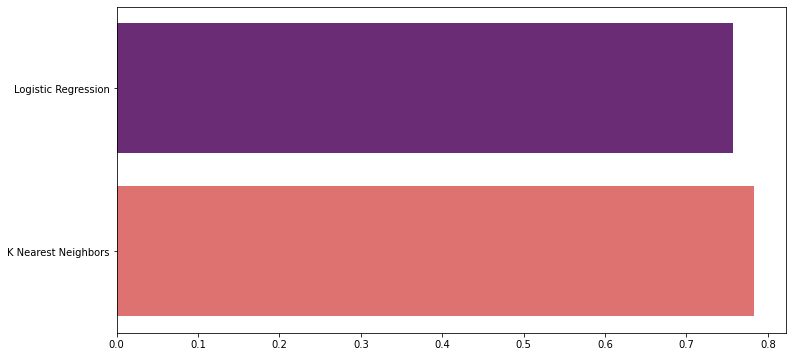

In [54]:
plt.figure(figsize = (12, 6))
sns.barplot(x = score, y = model, palette = 'magma')
plt.show()